# Diabetes Prediction

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 = Person hasn't diabetes or 1 = Person has diabetes)

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_palette('Set2')
#sns.set_style('white')
import plotly.express as px
import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

### Import dataset

In [47]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see that variables like Glucose, BloodPressure, SkinThickness, Insulin and BMI have values equal to 0.
We'll replace this values for the value of mean of each column of the dataset.

In [50]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [51]:
# Sum of values equal zero in each column
for col in data[select_col]:
    print('{}:'.format(col) , data[data[col]==0].value_counts().sum())

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [52]:
# Value of median 
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [53]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)

In [54]:
for col in data[select_col]:
    print('{}:'.format(col) , data[data[col]==0].value_counts().sum())

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


In [55]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Data visualization
## Outcomes

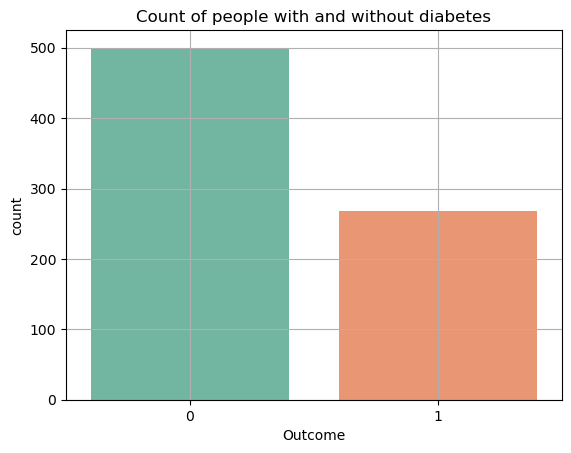

In [56]:
sns.countplot(x='Outcome',data=data, palette='Set2')
plt.title('Count of people with and without diabetes')
plt.grid()

In [57]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Ages

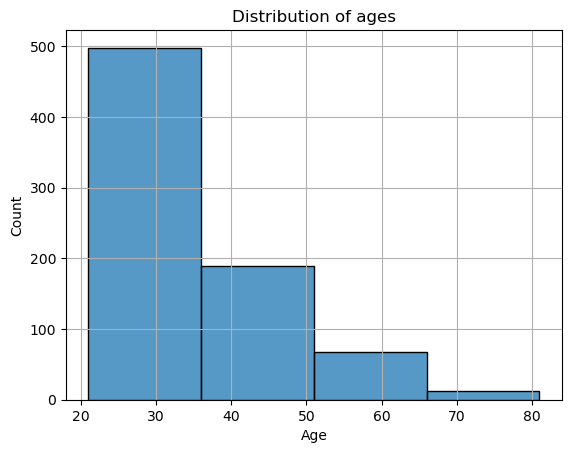

In [58]:
# Range of Ages
sns.histplot(data['Age'], bins=4)
plt.title('Distribution of ages')
plt.grid()

## Pregnancies

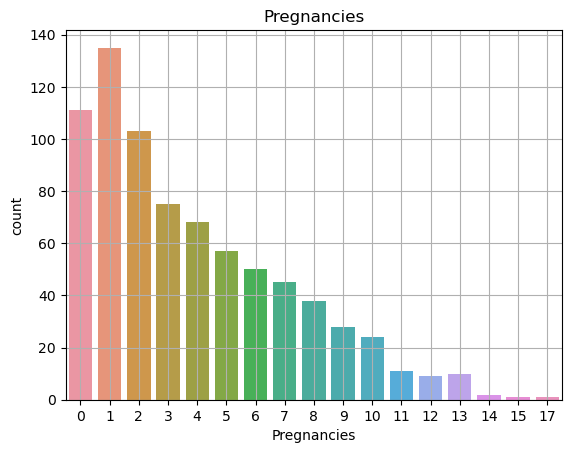

In [59]:
# Pregnancy count per woman
sns.countplot(x='Pregnancies', data=data)
plt.title('Pregnancies')
plt.grid()

## Glucose (mg/dL)

**Oral glucose tolerance test**: For this test, you fast overnight, and the fasting blood sugar level is measured. Then you drink a sugary liquid, and blood sugar levels are tested periodically for the next two hours.

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is ***normal***. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates ***diabetes***. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates ***prediabetes***.

source: <a>https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451</a>

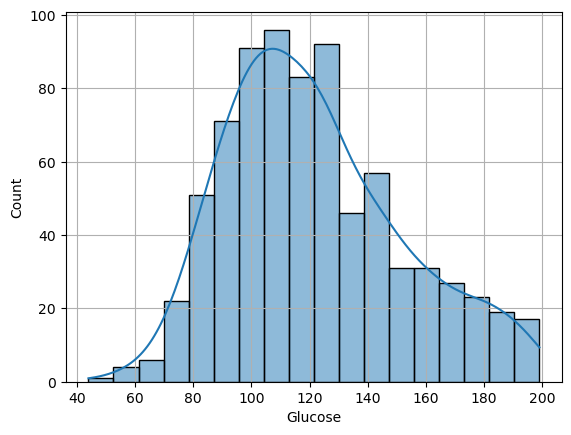

In [60]:
sns.histplot(data['Glucose'], kde=True)
plt.grid()

## Diastolic blood pressure (mm Hg)

The diastolic reading is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen.

This is what diastolic blood pressure number means:
* ***Normal***: Lower than 80 mmHg
* ***Stage 1 hypertension***: 80-89 mmHg
* ***Stage 2 hypertension***: 90 mmHg or more 

source: <a>https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers</a>

D:\anoconda 3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



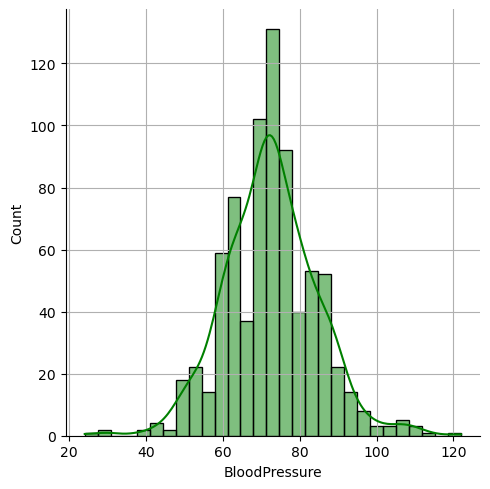

In [61]:
sns.displot(data['BloodPressure'],kde=True, color='green')
plt.grid()

## Body Mass Index (BMI)

The body mass index (BMI) is a measure that uses the height and weight to work out if the weight is healthy. The BMI calculation divides an adult's weight in kilograms by their height in metres squared.

If your BMI is:

* Below 18.5 – you're in the ***underweight*** range
* Between 18.5 and 24.9 – you're in the ***healthy weight*** range
* Between 25 and 29.9 – you're in the ***overweight*** range
* Between 30 and 39.9 – you're in the ***obese*** range

source: <a>https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/</a>

D:\anoconda 3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



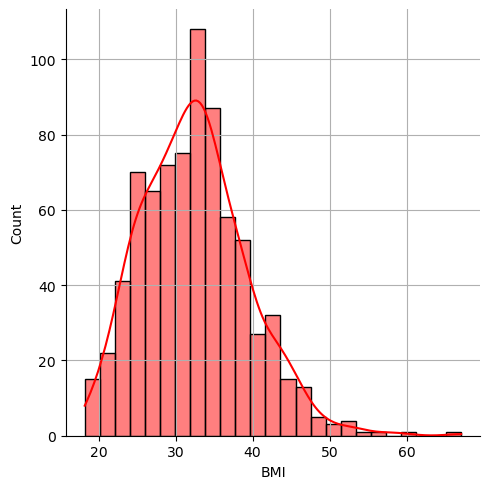

In [62]:
sns.displot(data['BMI'], kde=True, color='red')
plt.grid()

## SkinThickness
From a laboratory in Argentina, I found that an optimal value of skin thickness for people over 12 years of age is 3 to 17 Ul/ml.

source: <a>https://www.labmoreira.com/nuevos-examenes.asp?strClave=2</a>

D:\anoconda 3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



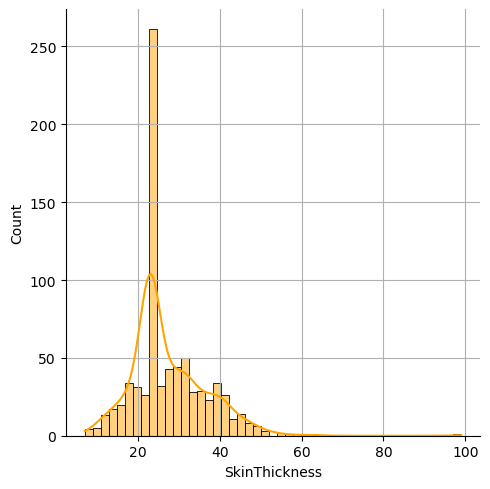

In [63]:
sns.displot(data['SkinThickness'], kde=True, color='orange')
plt.grid()

In [64]:
# Blood pressure lower than 80 is normal

fig = px.scatter(data, x="Age", y='BloodPressure',
             size="Glucose", color="Outcome",
                 hover_data=["BMI"], log_x=True, size_max=12, 
                 color_continuous_scale=[[0, 'rgb(102, 194, 165)'], [1.0, 'rgb(225, 128, 114)']],
                 title="General view"
                 )
fig.add_shape(type="line",
    x0=20, y0=80, x1=85, y1=80,
    line=dict(color="blue",width=2,dash="dash")
 )

fig.show()

In [65]:
# We differentiate the data with Outcome 0 and 1
out_0 = data[data['Outcome']==0]
out_1 = data[data['Outcome']==1]

In [66]:
# We'll buil a function to represent de differents distributions with respect to "Outcome"
def visualization(variable):
    fig=go.Figure()
    fig.add_trace(go.Box(y=out_0[variable],name=0,marker_color='rgb(102, 194, 165)',boxpoints="all",whiskerwidth=0.3))
    fig.add_trace(go.Box(y=out_1[variable],name=1,marker_color='rgb(225, 128, 114)',boxpoints="all",whiskerwidth=0.3))
    fig.update_layout(title="{} distribution with respect to Outcome".format(variable),height=600)
    fig.show()

In [67]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in data[columns]:
    visualization(column)

# Correlations
We'll observing the correlation wich exist between all the variables.

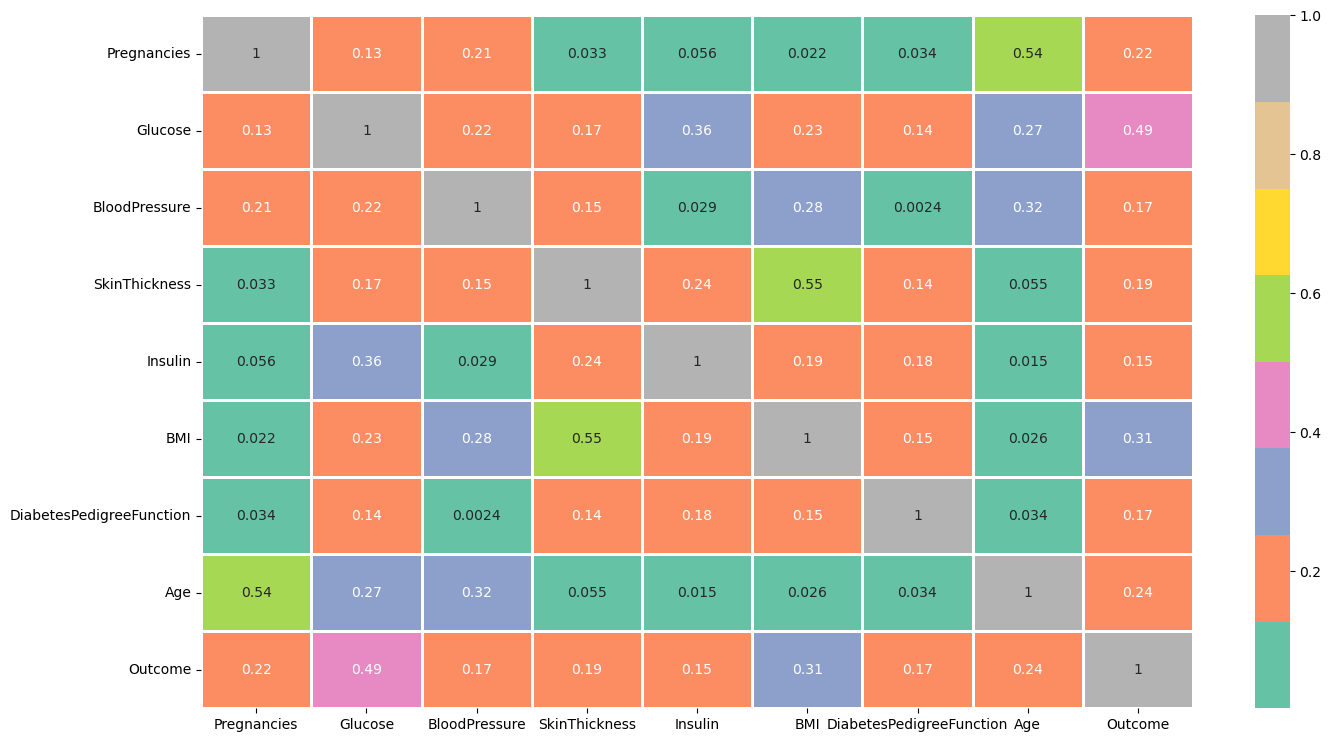

In [68]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(abs(corr), lw=1, annot=True, cmap='Set2')
plt.show()

We can see that the variable that most correlates with the "Outcome" is "Glucose" with a value of 0.49, while the lowest correlation is "BloodPresure" with a value of 0.16

## Data processing and scaling
We'll split the data into training and testing sets. Then we'll scale using StandarScale.

Both using diferents libraries from *scikit-learn*. For the training and testing data we'll use *train_test_split* from *sklearn.model_selection* and for scaling we'll use *StandardScaler* from *sklearn.preprocessing*

In [69]:
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=7)

SScaler = StandardScaler()
X_train = SScaler.fit_transform(X_train)
X_test = SScaler.fit_transform(X_test)

# Evaluation models

First we will build two functions. The first to represent the confusion matrix and some parameters of metrics, and the second to represent the roc curve

In [70]:
def impressions(model,accuracy):
    print('Accuracy: {} %'.format(accuracy))
    print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
    

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = [0, 1]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [71]:
def roc_curve(Y_test, Y_score):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
    score = metrics.auc(fpr, tpr)

    fig = px.area(
        #fpr = False Positive Rate; tpr= True Positive Rate
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()    

## Logistic Regression

Accuracy: 77.273 %
Mean squared error:  0.227


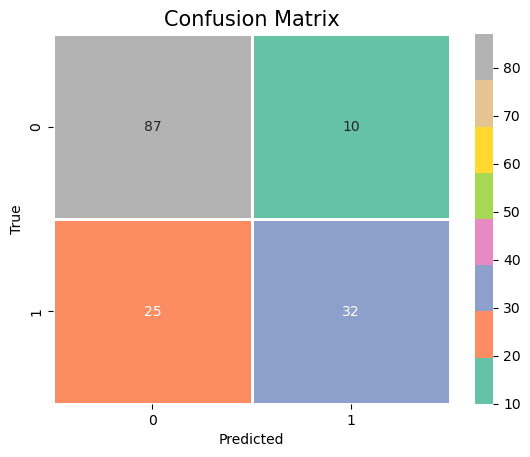

In [72]:
LogR= LogisticRegression()
LogR.fit(X_train,Y_train)
Y_pred= LogR.predict(X_test)

LogR_accuracy= round(accuracy_score(Y_test,Y_pred),5)*100

impressions(LogR,LogR_accuracy)

Y_score = LogR.predict_proba(X_test)[:,1]
roc_curve(Y_test,Y_score)

### K-Nearest Neighbors

Accuracy: 79.221 %
Mean squared error:  0.208


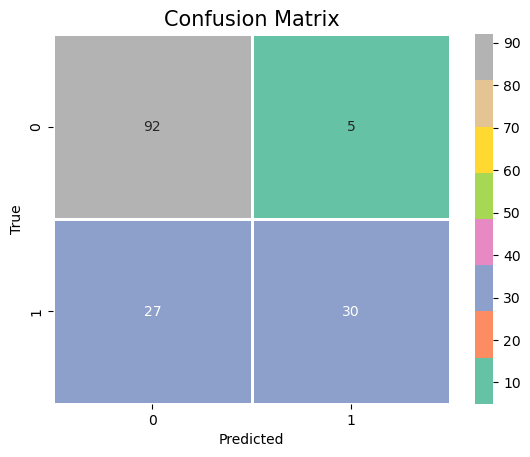

In [73]:
KNN= KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(KNN,KNN_accuracy)

Y_score = KNN.predict_proba(X_test)[:,1]
roc_curve(Y_test,Y_score)

### Support Vector Machine

Accuracy: 82.468 %
Mean squared error:  0.175


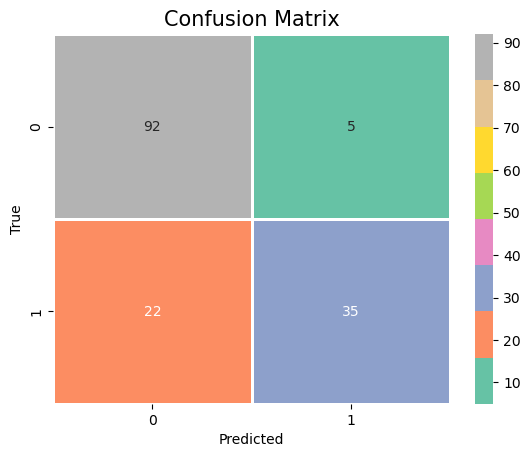

In [74]:
from sklearn.svm import SVC

svc= SVC(kernel='rbf')
svc.fit(X_train,Y_train)
Y_pred= svc.predict(X_test)

svc_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(svc,svc_accuracy)

### Random Forest

Accuracy: 80.51899999999999 %
Mean squared error:  0.195


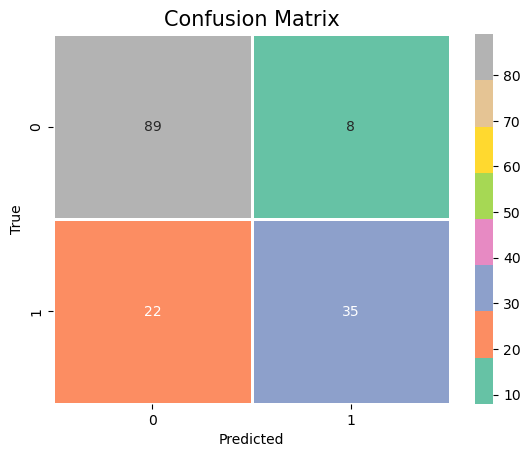

In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators=200, random_state=5, criterion='gini', max_depth=100)
rfc.fit(X_train,Y_train)
Y_pred= rfc.predict(X_test)

rfc_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(rfc,rfc_accuracy)

### Decision Tree Classifier

Accuracy: 75.325 %
Mean squared error:  0.247


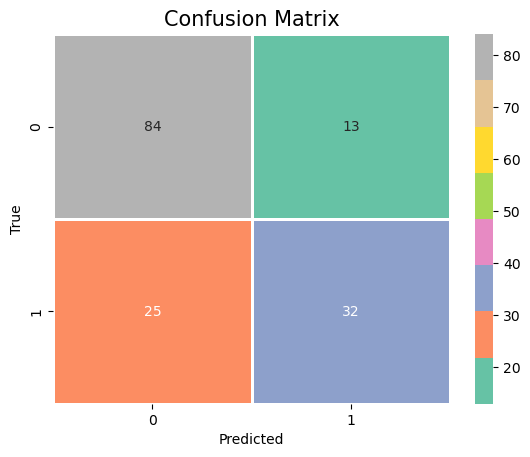

In [76]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10, max_depth=100)
tree.fit(X_train,Y_train)
Y_pred= tree.predict(X_test)

tree_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(tree,tree_accuracy)

Y_score = tree.predict_proba(X_test)[:,1]

### Adaboost Classifier

Accuracy: 78.57 %
Mean squared error:  0.214


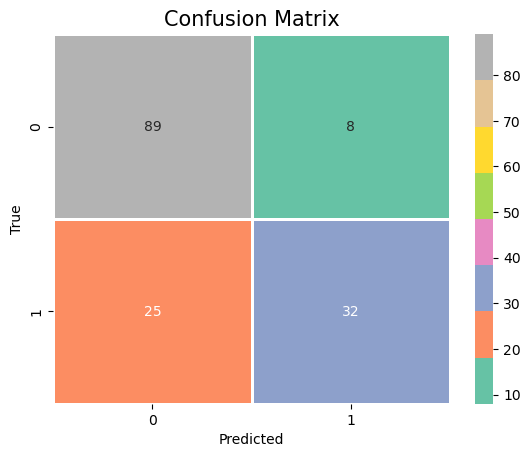

In [77]:
ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 40)
ADA.fit(X_train,Y_train)
Y_pred= ADA.predict(X_test)

ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

impressions(ADA,ADA_accuracy)